- STARTDATE, ENDDATE 분리 후 합치기만 함
- **STARTDATE ~ ENDDATE 사이 날짜 삽입 해야함.**

In [77]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf

# Data Load && 

In [78]:
lab = pd.read_csv('/data/MIMIC_III/LABEVENTS.csv')
pre = pd.read_csv('/data/MIMIC_III/PRESCRIPTIONS.csv')
pro = pd.read_csv('/data/MIMIC_III/PROCEDUREEVENTS_MV.csv')
폐렴환자 = pd.read_csv('/project/data/폐렴환자lab.csv')

In [79]:
lab['ITEMID'].nunique()
폐렴환자['ITEMID'].nunique()

690

In [80]:
#폐렴환자 id 추출
subid = 폐렴환자['SUBJECT_ID'].unique()
len(subid)

7799

In [81]:
import datetime as dt

#datetime - date만 추출하는 함수 생성

def only_date(time):
    time = pd.to_datetime(time)
    time = time.dt.date
    return time

In [82]:
lab

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal
...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN


In [91]:
pre.groupby(['DRUG'])['SUBJECT_ID'].count().sort_values(ascending=False)[:10]

DRUG
Potassium Chloride             192993
Insulin                        143465
D5W                            142241
Furosemide                     133122
0.9% Sodium Chloride           130147
NS                             129731
Magnesium Sulfate               90427
Iso-Osmotic Dextrose            87005
Sodium Chloride 0.9%  Flush     83392
Acetaminophen                   78768
Name: SUBJECT_ID, dtype: int64

In [84]:
pro

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258061,257337,41958,182711,246007.0,2155-08-09 01:51:00,2155-08-10 11:20:00,225204,2009.0,min,Right Antecube,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
258062,257338,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258063,257339,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225459,1.0,None,NaN,...,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
258064,257340,41958,182711,246007.0,2155-08-09 01:57:00,2155-08-09 01:58:00,225966,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,1,Rewritten,NaN,RN,2155-08-09 02:20:00


In [ ]:
pro.groupby(['DRUG'])['SUBJECT_ID'].count().sort_values(ascending=False)[:10]

In [94]:
d_diag = pd.read_csv('/project/data/D_ICD_DIAGNOSES.csv') #선행
[d_diag.groupby(['SHORT_TITLE'])['ICD9_CODE'].count().sort_values(ascending = False)[:10]]

[SHORT_TITLE
 Op skl base fx-deep coma    5
 Opn skul fx NEC-brf coma    5
 Cl skl w oth fx-mod coma    5
 Cl skl w oth fx-coma NOS    5
 Cl skl w oth fx-brf coma    5
 Cl skl w oth fx w/o coma    5
 Opn skul/oth fx-coma NOS    5
 Opn skul/oth fx-brf coma    5
 Opn skul/oth fx w/o coma    5
 Cl skl vlt fx-proln coma    5
 Name: ICD9_CODE, dtype: int64]

In [ ]:
Op skl base fx-deep coma    5
 Opn skul fx NEC-brf coma    5
 Cl skl w oth fx-mod coma    5
 Cl skl w oth fx-coma NOS    5
 Cl skl w oth fx-brf coma    5
 Cl skl w oth fx w/o coma    5
 Opn skul/oth fx-coma NOS    5
 Opn skul/oth fx-brf coma    5
 Opn skul/oth fx w/o coma    5
 Cl skl vlt fx-proln coma 

# LAB2

In [ ]:
len(subid)

In [ ]:
lab2 = lab[(lab['SUBJECT_ID'].isin(subid))&(lab['FLAG']=='abnormal')].reset_index(drop=True)
lab2 = lab2[['SUBJECT_ID','ITEMID','CHARTTIME']]
lab2['Type'] = 'LAB'

In [ ]:
lab2['CHARTTIME'] = only_date(lab2['CHARTTIME'])
lab2 = lab2.rename(columns={'CHARTTIME':'DATE', 'ITEMID':'ITEM'})
lab2 = lab2[['SUBJECT_ID','DATE','ITEM','Type']]

In [ ]:
lab2

# PRE2

In [ ]:
pre2 = pre[pre['SUBJECT_ID'].isin(subid)].reset_index(drop=True)
pre2 = pre2[['SUBJECT_ID','STARTDATE','ENDDATE','NDC']]

#time drop, yyyy-mm-dd로 변경
pre2['STARTDATE'], pre2['ENDDATE'] = only_date(pre2['STARTDATE']), only_date(pre2['ENDDATE'])

pre2.shape

In [ ]:
#enddate가 null인 값은 startdate 삽입
end_null = pre2[(pre2['ENDDATE'].isnull())&(pre2['STARTDATE'].notnull())]
end_null['ENDDATE'] = end_null['STARTDATE']

start_null = pre2[(pre2['STARTDATE'].isnull())&(pre2['ENDDATE'].notnull())]
start_null['STARTDATE'] = start_null['ENDDATE']

pre2.loc[end_null.index] = end_null
pre2.loc[start_null.index] = start_null

In [ ]:
#drop null
# pre2 = pre2.drop(pre2[pre2['STARTDATE'].isnull()].index).sort_values(['SUBJECT_ID','STARTDATE']).reset_index(drop=True)
pre2 = pre2.dropna().sort_values(['SUBJECT_ID','STARTDATE']).reset_index(drop=True)

In [ ]:
print(pre2.shape)
pre2.isnull().sum()

In [ ]:
from datetime import datetime, timedelta

def date_range(start, end):
    dates = [(start + timedelta(days=i)).strftime("%Y-%m-%d") for i in range((end-start).days+1)]
    return dates

In [ ]:
# index에 맞춰서 itemid 넣어주려고 dic 생성, key: index, value: 기간
pre2_dic = {}
for i in range(len(pre2)):
    d = date_range(pre2['STARTDATE'][i], pre2['ENDDATE'][i])
    pre2_dic[i] = d
    
lst_time = []
for i in range(len(pre2)):
    lst_time.extend(pre2_dic[i][:])
    
# pre2 NDC열에 들어갈 lst
lst_itemid = []
for i in range(len(pre2)):
    for j in pre2_dic[i]:
        lst_itemid.append(pre2['NDC'][i])
        
# pre2 subid열에 들어갈 lst
lst_subid = []
for i in range(len(pre2)):
    for j in pre2_dic[i]:
        lst_subid.append(pre2['SUBJECT_ID'][i])

pre2sub = pd.DataFrame(lst_subid)
pre2time = pd.DataFrame(lst_time)
pre2item = pd.DataFrame(lst_itemid)

In [ ]:
pre2_completed = pd.concat([pre2sub, pre2time, pre2item], axis = 1)
pre2_completed.columns = ['SUBJECT_ID', 'DATE', 'ITEM']
pre2_completed['Type'] = 'PRE'
pre2_completed

# PRO2

In [ ]:
pro2 = pro[pro['SUBJECT_ID'].isin(subid)].reset_index(drop=True)
pro2 = pro2[['SUBJECT_ID','STARTTIME','ENDTIME','ITEMID']]
pro2['STARTTIME'], pro2['ENDTIME'] = only_date(pro2['STARTTIME']), only_date(pro2['ENDTIME'])

In [ ]:
pro2.isnull().sum()

In [ ]:
# index에 맞춰서 itemid 넣어주려고 dic 생성, key: index, value: 기간
pro2_dic = {}
for i in range(len(pro2)):
    d = date_range(pro2['STARTTIME'][i], pro2['ENDTIME'][i])
    pro2_dic[i] = d
    
lst_time = []
for i in range(len(pro2)):
    lst_time.extend(pro2_dic[i][:])
    
# pro2 NDC열에 들어갈 lst
lst_itemid = []
for i in range(len(pro2)):
    for j in pro2_dic[i]:
        lst_itemid.append(pro2['ITEMID'][i])
        
# pro2 subid열에 들어갈 lst
lst_subid = []
for i in range(len(pro2)):
    for j in pro2_dic[i]:
        lst_subid.append(pro2['SUBJECT_ID'][i])

pro2sub = pd.DataFrame(lst_subid)
pro2time = pd.DataFrame(lst_time)
pro2item = pd.DataFrame(lst_itemid)

In [20]:
pro2_completed = pd.concat([pro2sub, pro2time, pro2item], axis = 1)
pro2_completed.columns = ['SUBJECT_ID', 'DATE', 'ITEM']
pro2_completed['Type'] = 'PRO'
pro2_completed

,SUBJECT_ID,DATE,ITEM,Type
0,31608,2133-01-10,224385,PRO
1,31608,2133-01-10,225792,PRO
2,31608,2133-01-11,225792,PRO
3,31608,2133-01-12,225792,PRO
4,31608,2133-01-13,225792,PRO
...,...,...,...,...
164937,41958,2155-08-10,225204,PRO
164938,41958,2155-08-09,225402,PRO
164939,41958,2155-08-09,225459,PRO
164940,41958,2155-08-09,225966,PRO


# Merge

In [21]:
lab2.columns, pre2_completed.columns, pro2_completed.columns

(Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'),
 Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'),
 Index(['SUBJECT_ID', 'DATE', 'ITEM', 'Type'], dtype='object'))

In [22]:
len(lab2)+len(pro2)+len(pre2)

4813536

In [23]:
m1 = pd.merge(lab2, pre2_completed, on=['SUBJECT_ID','DATE','ITEM','Type'], how='outer').sort_values(['SUBJECT_ID','DATE'])
total_data = pd.merge(m1, pro2_completed, on=['SUBJECT_ID','DATE','ITEM','Type'], how='outer').sort_values(['SUBJECT_ID','DATE']).reset_index(drop=True)
total_data

,SUBJECT_ID,DATE,ITEM,Type
0,9,2149-11-09,50882.0,LAB
1,9,2149-11-09,50931.0,LAB
2,9,2149-11-09,50971.0,LAB
3,9,2149-11-09,51275.0,LAB
4,9,2149-11-09,51288.0,LAB
...,...,...,...,...
9221915,99985,2181-03-06,51288.0,LAB
9221916,99985,2182-03-14,51279.0,LAB
9221917,99985,2182-03-14,51006.0,LAB
9221918,99985,2182-03-14,51221.0,LAB


In [24]:
total_data['ITEM'].nunique()

4069

In [25]:
total_data['SUBJECT_ID'].nunique()

7799

In [26]:
total_data['ITEM'] = total_data['ITEM'].astype(int)
total_data.to_csv('./data/merge_data.csv',index=False)

# Model

In [8]:
total_data = pd.read_csv('./data/merge_data.csv')

## RF

In [9]:
itemid_uniq = list(total_data['ITEM'].sort_values(ascending=True).unique())
itemid_uniq1 = list(map(str, itemid_uniq))
zero_matrix = np.zeros((len(subid), len(itemid_uniq)))
df = pd.DataFrame(zero_matrix, columns=itemid_uniq1)

In [10]:
df['환자id'] = subid
df = df.set_index('환자id')

In [11]:
import time
start = time.time()

for i, num in zip(total_data['SUBJECT_ID'], total_data.ITEM):
    df.loc[i, str(num)] = 1
    
print("time :", (time.time() - start)/60, '분') 

KeyboardInterrupt: 

In [ ]:
df.sum().sum()

In [ ]:
#환자id 기준으로 정렬
df = df.sort_values(by=['환자id'])

In [ ]:
df

In [34]:
df.to_csv('./data/data2d_forposter.csv',index=False)

In [56]:
df = pd.read_csv('./data/data2d_forposter.csv')

In [57]:
df

,0,50803,50804,50805,50806,50808,50809,50811,50813,50814,...,74300000533,74312000660,74312001370,76329301205,76336045517,78112001103,79511050204,87701071218,87701083336,87701089415
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7795,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7797,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Label

In [13]:
폐렴환자1 = pd.read_csv('/project/data/폐렴환자.csv')
label = 폐렴환자1[폐렴환자1['SUBJECT_ID'].isin(subid)][['SUBJECT_ID','EXPIRE_FLAG']].sort_values('SUBJECT_ID').reset_index()['EXPIRE_FLAG']

In [74]:
np.save("./data/2030days_label.npy",label)

In [14]:
df.shape

(7799, 4069)

In [24]:
round(df.shape[0]*0.8)

6239

In [30]:
i=round(df.shape[0]*0.8)
X_train = df.iloc[:i,:]
y_train = label[:i]

X_test = df.iloc[i:,:]
y_test = label[i:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6239, 4069), (6239,), (1560, 4069), (1560,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1)
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

In [32]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7493589743589744


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    print(fi_df)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

     feature_names  feature_importance
0                0            0.001073
1            50803            0.001343
2            50804            0.001889
3            50805            0.000063
4            50806            0.001930
...            ...                 ...
4064   78112001103            0.000148
4065   79511050204            0.000000
4066   87701071218            0.000295
4067   87701083336            0.000106
4068   87701089415            0.000051

[4069 rows x 2 columns]


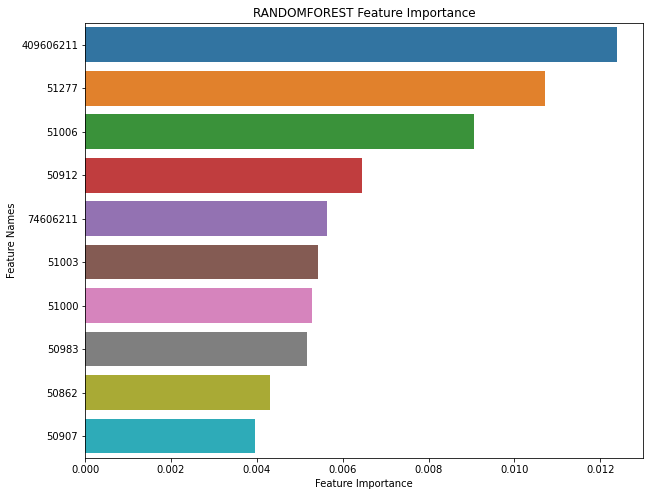

In [29]:
plot_feature_importance(forest.feature_importances_,X_test.columns,'RANDOMFOREST')

In [34]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7583


In [35]:
from xgboost import XGBClassifier
# import metrics to compute accuracy
# from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
xgb=XGBClassifier() 


# fit classifier to training set
xgb.fit(X_train,y_train)


# make predictions on test set
y_pred=xgb.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[10:27:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy score with default hyperparameters: 0.7372


In [36]:
X_train.shape

(6239, 4069)

In [48]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[0],X_train.shape[1]), activation='relu'))
model.add(Dense(10))
model.add(Dense(8))
model.add(Dense(1)) 

In [49]:
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, batch_size=128)

Epoch 1/100
49/49 [==============================] - 1s 4ms/step - loss: 0.3160 - acc: 0.5526
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1650 - acc: 0.7720
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1376 - acc: 0.8254
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: 0.1224 - acc: 0.8479
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1106 - acc: 0.8704
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.1006 - acc: 0.8827
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: 0.0924 - acc: 0.8976
Epoch 8/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0830 - acc: 0.9172
Epoch 9/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0787 - acc: 0.9186
Epoch 10/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0722 - acc: 0.9333
Epoch 11/100
49/49 [==============================] - 0s 3m

In [50]:
model.fit(X_train,y_train)

preds = model.predict(X_test)

preds[preds>0.5]=1
preds[preds<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, preds))

195/195 [==============================] - 1s 3ms/step - loss: 0.0461 - acc: 0.9726
정확도 : 0.6820512820512821


In [54]:
from sklearn.metrics import roc_auc_score

print(' roc auc value : ', roc_auc_score(y_test, preds))

 roc auc value :  0.681177050797304


## 시계열

In [60]:
data = pd.read_csv('./data/merge_data.csv')
data = data.set_index('SUBJECT_ID')
label = pd.read_csv("./data/2030days_label.npy")

In [61]:
admission = pd.read_csv('../data/ADMISSIONS.csv')
# admission.groupby('SUBJECT_ID')['DISCHTIME'].max()
admission = admission[admission['SUBJECT_ID'].isin(data.index.unique())]

import datetime as dt
admission['DISCHTIME'] = pd.to_datetime(admission['DISCHTIME'])
admission['DISCHTIME'] = admission['DISCHTIME'].dt.date

#final_date
dic_sub2final_date = dict(admission.groupby('SUBJECT_ID')['DISCHTIME'].max())

#sub2idx
dic_sub2idx = {}
for i,j in enumerate(data.index.unique()):
    dic_sub2idx[j] = i

    #item2idx
dic_item2idx = {}
for i,j in enumerate(data['ITEM'].sort_values().unique()):
    dic_item2idx[j] = i

In [62]:
print('dic_sub2idx length : ', len(dic_sub2idx))
print('dic_item2idx length : ', len(dic_item2idx))
print('dic_sub2final_date length : ', len(dic_sub2final_date))

dic_sub2idx length :  7799
dic_item2idx length :  4069
dic_sub2final_date length :  7799


In [63]:
data.head(1)

,DATE,ITEM,Type
SUBJECT_ID,,,
9,2149-11-09,50882,LAB


In [64]:
dic_item2idx[50883]

35

### 10일치

In [65]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),10,len(dic_item2idx)))
x.shape

IF=open("./data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 10
    
    if (dateidx < 0) or (dateidx > 9) :
        continue
    else:
#         print(finaldate, date, dateidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.41984949906667074 분
2042722.0


In [66]:
# np.save("./data/10days_data.npy",x)

In [67]:
x.shape

(7799, 10, 4069)

In [68]:
x.shape[0]*0.7

5459.299999999999

In [69]:
# 5460 기준으로 split
i=5460
X_train = x[:i,:,:]
y_train = label[:i]


X_test = x[i:,:,:]
y_test = label[i:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5460, 10, 4069), (1, 5), (2339, 10, 4069), (0, 5))

In [70]:
import math
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

In [51]:
# from keras.regularizers import l2

# seed_num = 42
# np.random.seed(seed_num)
# tf.random.set_seed(seed_num)

# lstm = Sequential()
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True,
#          bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, x.shape[2]),
#               bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(Dense(units=1, activation='sigmoid'))
# print(lstm.summary())

In [52]:
# from keras.callbacks import EarlyStopping

# lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
# early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=2000, callbacks=[early_stop])

In [53]:
lstm2 = Sequential()
lstm2.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(x.shape[1], x.shape[2])))
lstm2.add(Dense(units=1, activation='sigmoid'))
print(lstm2.summary())

from keras.callbacks import EarlyStopping

lstm2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop], shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 130496    
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 130,505
Trainable params: 130,505
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
32/32 [==============================] - 13s 29ms/step - loss: 0.6220 - acc: 0.6932 - val_loss: 0.6912 - val_acc: 0.5861
Epoch 2/200
32/32 [==============================] - 0s 12ms/step - loss: 0.5818 - acc: 0.6932 - val_loss: 0.6531 - val_acc: 0.5861
Epoch 3/200
32/32 [==============================] - 0s 13ms/step - loss: 0.5550 - acc: 0.6932 - val_loss: 0.6247 - val_acc: 0.5861
Epoch 4/200
32/32 [==============================] - 0s 12ms/step - loss: 0.5343 - acc: 0.6932 - val_loss: 0.6

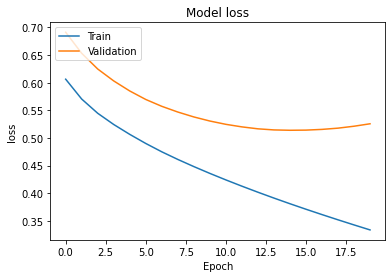

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

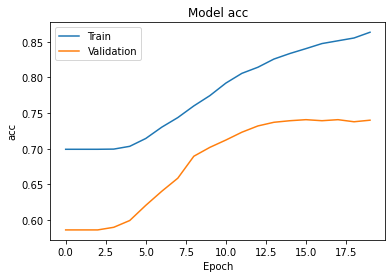

In [55]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
pred = lstm2.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

In [59]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.7079948696023942


### 10일치 RF

In [71]:
arr=x

arr_2d=[]
for i in range(len(arr)):
    for k in arr[i,:,:].sum(axis=0):
        if k > 0:
            k=1
        arr_2d.append(k)
arr_2d = np.array(arr_2d)
arr_2d = arr_2d.reshape(7799,-1)

In [72]:
arr_2d.shape

(7799, 4069)

In [76]:
np.save('./data/arr_2d.npy',arr_2d)

In [73]:
# 5460 기준으로 split
i=5460
X_train = arr_2d[:i,:]
y_train = label[:i]


X_test = arr_2d[i:,:]
y_test = label[i:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5460, 4069), (1, 5), (2339, 4069), (0, 5))

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

ValueError: Input contains NaN

In [ ]:
from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

### 30일치

In [66]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),30,len(dic_item2idx)))
x.shape

IF=open("./data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 30

    if (dateidx < 0) or (dateidx > 29) :
        continue
    else:
#         print(subidx, dateidx, itemidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.2102282444636027 분
3490969.0


In [67]:
np.save("./data/30days_data.npy", x)

In [69]:
np.load("./data/30days_data.npy").shape

(7799, 30, 4069)

In [ ]:
# 6240을 기준으로 split
X_train = x[:6240,:,:]
y_train = label[:6240]


X_test = x[6240:,:,:]
y_test = label[6240:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# from keras.regularizers import l2

# seed_num = 42
# np.random.seed(seed_num)
# tf.random.set_seed(seed_num)

# lstm = Sequential()
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True,
#          bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, x.shape[2]),
#               bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(Dense(units=1, activation='sigmoid'))
# print(lstm.summary())

In [ ]:
# from keras.callbacks import EarlyStopping

# lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
# early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=1000, callbacks=[early_stop])

In [ ]:
seed_num = 42
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

lstm2 = Sequential()
lstm2.add(LSTM(units=16, activation='sigmoid', recurrent_activation='hard_sigmoid',
               input_shape=(x.shape[1], x.shape[2]),return_sequences=True))
lstm2.add(LSTM(units=16, activation='sigmoid', recurrent_activation='hard_sigmoid',
               input_shape=(x.shape[1], x.shape[2]),return_sequences=True))
lstm2.add(LSTM(units=16, activation='sigmoid', recurrent_activation='hard_sigmoid',
               input_shape=(x.shape[1], x.shape[2])))
lstm2.add(Dense(units=1, activation='sigmoid'))
print(lstm2.summary())

from keras.callbacks import EarlyStopping

lstm2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop], shuffle=False)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred = lstm2.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

## 19일치 ++ (10/25)

In [33]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),19,len(dic_item2idx)))
x.shape

IF=open("./data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 19

    if (dateidx < 0) or (dateidx > 18) :
        continue
    else:
        print(date, finaldate, dateidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-09 2149-11-14 14
2149-11-10 2149-11-14 15
2149-11-10 2149-11-14 15
2149-11-10 2149-11-14 15


2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14
2134-05-15 2134-05-20 14


2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-24 2133-01-27 16
2133-01-25 2133-01-27 17
2133-01-25 2133-01-27 17
2133-01-25 2133-01-27 17


2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-28 2167-07-30 17
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18
2167-07-29 2167-07-30 18


2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-08-30 2
2142-08-13 2142-

2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17
2133-11-29 2133-12-01 17


2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12
2166-01-25 2166-02-01 12


2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-05 2107-10-08 16
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17
2107-10-06 2107-10-08 17


2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14
2106-06-19 2106-06-24 14


2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-14 2117-01-16 17
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18
2117-01-15 2117-01-16 18


2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-09 2125-12-12 16
2125-12-10 2125-12-12 17
2125-12-10 2125-12-12 17
2125-12-10 2125-12-12 17
2125-12-10 2125-12-12 17


2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-02 2162-01-17 4
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-01-17 5
2162-01-03 2162-

2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-11 2196-04-21 9
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196-04-12 2196-04-21 10
2196

2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-19 2197-12-29 9
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-12-20 2197-12-29 10
2197-1

2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-12-28 7
2103-12-16 2103-

2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-07 2168-01-13 13
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14
2168-01-08 2168-01-13 14


2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-15 2133-08-19 15
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16
2133-08-16 2133-08-19 16


2114-07-04 2114-07-12 11
2114-07-04 2114-07-12 11
2114-07-04 2114-07-12 11
2114-07-04 2114-07-12 11
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-05 2114-07-12 12
2114-07-06 2114-07-12 13
2114-07-06 2114-07-12 13
2114-07-06 2114-07-12 13


2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-23 2129-09-07 4
2129-08-24 2129-09-07 5
2129-08-24 2129-09-07 5
2129-08-24 2129-09-07 5
2129-08-24 2129-09-07 5
2129-08-24 2129-

2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-20 2149-12-22 17
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18
2149-12-21 2149-12-22 18


2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-01-18 0
2199-12-30 2200-

2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-27 2176-07-02 14
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15
2176-06-28 2176-07-02 15


2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13
2108-09-29 2108-10-05 13


2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-16 2149-05-26 9
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2149-05-26 10
2149-05-17 2

2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-05 2101-09-16 8
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-09-16 9
2101-09-06 2101-

2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-08-13 4
2110-07-29 2110-

2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-10 2146-03-01 0
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-03-01 1
2146-02-11 2146-

2192-08-15 2192-08-29 5
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-16 2192-08-29 6
2192-08-17 2192-08-29 7
2192-08-17 2192-08-29 7
2192-08-17 2192-08-29 7
2192-08-18 2192-08-29 8
2192-08-20 2192-08-29 10
2192-08-20 2192-08-29 10
2192-08-20 2192-08-29 10
2192-08-20 2192-08-29 10
2192-08-22 2192-08-29 12
2192-08-22 2192-08-29 12
2192-08-22 2192-08-29 12
2192-08-24 2192-08-29 14
2192-08-24 2192-08-29 14
2192-08-24 2192-08-29 14
2192-08-27 2192-08-29 17
2192-08-27 2192-08-29 17
2192-08-27 2192-08-29 17
2192-08-27 2192-08-29 17
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2192-08-28 2192-08-29 18
2147-01-25 2147-02-13 0
2147-01-25 214

2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-20 2148-10-24 15
2148-10-21 2148-10-24 16
2148-10-21 2148-10-24 16
2148-10-21 2148-10-24 16
2148-10-21 2148-10-24 16
2148-10-21 2148-10-24 16
2148-10-21 2148-10-24 16


2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-04-27 0
2119-04-08 2119-

2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-30 2161-11-16 2
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-11-16 3
2161-10-31 2161-

2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-24 2127-04-07 5
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-03-25 2127-04-07 6
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
2127-04-01 2127-04-07 13
212

2126-08-23 2126-08-30 12
2126-08-23 2126-08-30 12
2126-08-23 2126-08-30 12
2126-08-23 2126-08-30 12
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13
2126-08-24 2126-08-30 13


2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-05 2197-12-14 10
2197-12-06 2197-12-14 11
2197-12-06 2197-12-14 11
2197-12-06 2197-12-14 11
2197-12-06 2197-12-14 11


2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15
2121-02-02 2121-02-06 15


2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10
2154-01-23 2154-02-01 10


2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-24 2119-06-03 9
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 2119-06-03 10
2119-05-25 211

2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13
2178-08-07 2178-08-13 13


2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-04 2185-05-16 7
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-05-16 8
2185-05-05 2185-

2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10
2160-05-12 2160-05-21 10


2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-25 2169-07-10 4
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-26 2169-07-10 5
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-27 2169-07-10 6
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-07-10 7
2169-06-28 2169-

2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-05 2203-11-07 17
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18
2203-11-06 2203-11-07 18


2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-09 2198-07-16 12
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13
2198-07-10 2198-07-16 13


2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2144-02-28 2144-02-29 18
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2121-02-22 2121-03-13 0
2

2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-26 2174-02-02 12
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-27 2174-02-02 13
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14
2174-01-28 2174-02-02 14


2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-28 2137-12-03 14
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15
2137-11-29 2137-12-03 15


2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-02-19 6
2127-02-06 2127-

2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-17 2127-02-19 17
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18
2127-02-18 2127-02-19 18


2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-05-25 5
2147-05-11 2147-

2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-15 2179-10-22 12
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13
2179-10-16 2179-10-22 13


2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-27 2159-08-29 17
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18
2159-08-28 2159-08-29 18


2159-04-04 2159-04-13 10
2159-04-04 2159-04-13 10
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-05 2159-04-13 11
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12
2159-04-06 2159-04-13 12


2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-27 2197-07-05 11
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12
2197-06-28 2197-07-05 12


KeyboardInterrupt: 

In [30]:
# np.save("./data/19days_data.npy", x)

## 20일치

In [23]:
from datetime import timedelta
import time
from tqdm.auto import tqdm
import datetime

start = time.time()  # 시작 시간 저장


x = np.zeros((len(dic_sub2idx),20,len(dic_item2idx)))
x.shape

IF=open("./data/merge_data.csv",'r')
line=IF.readline()
for line in IF:
    ss=line.strip("\n").split(',')
    sub, date, item = int(ss[0]), datetime.date.fromisoformat(ss[1]), int(ss[2])

    subidx = dic_sub2idx[sub]
    itemidx = dic_item2idx[item]
    finaldate = dic_sub2final_date[sub]
    dateidx = -(finaldate - date).days + 20

    if (dateidx < 0) or (dateidx > 19) :
        continue
    else:
#         print(subidx, dateidx, itemidx)
        x[subidx, dateidx, itemidx] = 1
    
IF.close()
        
        
print("time :", (time.time() - start)/60, '분') 
print(x.sum())

time : 0.20910669167836507 분
3006682.0


In [71]:
np.save("./data/20days_data.npy", x)

In [73]:
np.load("./data/20days_data.npy").shape
# x.shape

(7799, 20, 4069)

In [10]:
x = np.load('./data/19days_data.npy')

In [12]:
x.shape

(7799, 19, 4069)

In [17]:
label = np.load("./data/2030days_label.npy")

In [18]:
# 6240을 기준으로 split
X_train = x[:6240,:,:]
y_train = label[:6240]


X_test = x[6240:,:,:]
y_test = label[6240:]


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6240, 19, 4069), (6240,), (1559, 19, 4069), (1559,))

In [ ]:
# from keras.regularizers import l2

# seed_num = 42
# np.random.seed(seed_num)
# tf.random.set_seed(seed_num)

# lstm = Sequential()
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(x.shape[1], x.shape[2]),return_sequences=True,
#          bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(LSTM(units=12, activation='tanh', input_shape=(12, x.shape[2]),
#               bias_regularizer=l2(0.001), kernel_regularizer=l2(0.001),recurrent_regularizer=l2(0.001)))
# lstm.add(Dense(units=1, activation='sigmoid'))
# print(lstm.summary())

In [ ]:
# from keras.callbacks import EarlyStopping

# lstm.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
# early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
# history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=1000, callbacks=[early_stop])

##

In [21]:
lstm2 = Sequential()
lstm2.add(LSTM(units=8, activation='sigmoid', recurrent_activation='hard_sigmoid', input_shape=(x.shape[1], x.shape[2])))
lstm2.add(Dense(units=1, activation='sigmoid'))
print(lstm2.summary())

from keras.callbacks import EarlyStopping

lstm2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc']) #loss='categorical_crossentropy'
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm2.fit(X_train, y_train, validation_split=0.25, batch_size=128, epochs=200,  callbacks=[early_stop])#, shuffle=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 130496    
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 130,505
Trainable params: 130,505
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
37/37 [==============================] - 14s 46ms/step - loss: 0.6853 - acc: 0.4951 - val_loss: 0.6850 - val_acc: 0.4923
Epoch 2/200
37/37 [==============================] - 1s 26ms/step - loss: 0.5923 - acc: 0.6840 - val_loss: 0.6873 - val_acc: 0.4987
Epoch 3/200
37/37 [==============================] - 1s 26ms/step - loss: 0.5659 - acc: 0.6934 - val_loss: 0.6560 - val_acc: 0.5295
Epoch 4/200
37/37 [==============================] - 1s 26ms/step - loss: 0.5481 - acc: 0.7077 - val_loss: 0.6

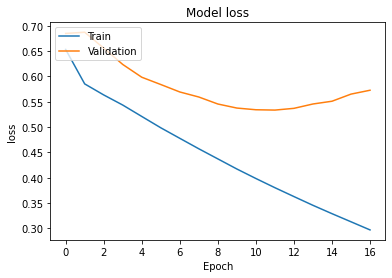

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

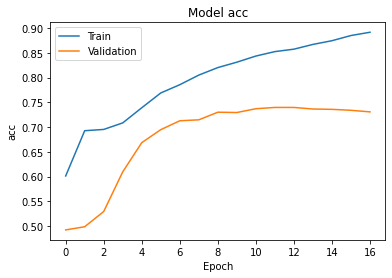

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
pred = lstm2.predict(X_test)
pred[pred>0.5]=1
pred[pred<=0.5]=0

from sklearn import metrics 
print('정확도 :', metrics.accuracy_score(y_test, pred))

정확도 : 0.7280307889672867


In [25]:
pred.shape

(1559, 1)

In [ ]:
total_data['SUBJECT_ID'].unique()

In [ ]:
label

In [ ]:
dic_sub2final_date[31]

In [ ]:
total_data[total_data['SUBJECT_ID']==31].tail(30)

In [ ]:
admission[admission['SUBJECT_ID']==31]

In [ ]:
pre[pre['SUBJECT_ID']==31]['ENDDATE'].unique()

In [ ]:
pre[pre['SUBJECT_ID']==31]

In [ ]:
label.shape

In [ ]:
x[0]